In [83]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series
%matplotlib inline

In [84]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample = pd.read_csv('data/sample_submission.csv')

## NaN 값 처리

In [85]:
train['Name'] = train['Name'].replace(np.nan, 'Unknown', regex=True)
train['AgeuponOutcome'] = train['AgeuponOutcome'].replace(np.nan, '0 days', regex=True)
train['OutcomeSubtype'] = train['OutcomeSubtype'].replace(np.nan, 'None', regex=True)
train['SexuponOutcome'] = train['SexuponOutcome'].replace(np.nan, 'Unknown', regex=True)

## 나이 단위를 일(day)로 통일

In [86]:
byday = []

for i in train['AgeuponOutcome']:
    i = str(i)
    num, unit = i.split(' ')
    if unit == 'day' or unit == 'days':
        num = int(num) * 1
    elif unit == 'week' or unit == 'weeks':
        num = int(num) * 7
    elif unit == 'month' or unit == 'months':
        num = int(num) * 30
    else:
        num = int(num) * 365
    byday.append(num)

train['AgebyDay'] = Series(byday)

## 더미화

In [87]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train['SexuponOutcome'] = encoder.fit_transform(train['SexuponOutcome'])
train['AnimalType'] = encoder.fit_transform(train['AnimalType'])

## 분류나무 실행

In [88]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)

In [89]:
X = train[['AnimalType', 'SexuponOutcome', 'AgebyDay']]
Y = train['OutcomeType']

In [90]:
clf = clf.fit(X, Y)

In [91]:
clf.score(X, Y)

0.60825320812600547

In [92]:
clf_X = ['AnimalType', 'SexuponOutcome', 'AgebyDay']

In [93]:
from IPython.display import Image
from sklearn import tree
import pydotplus 
import graphviz

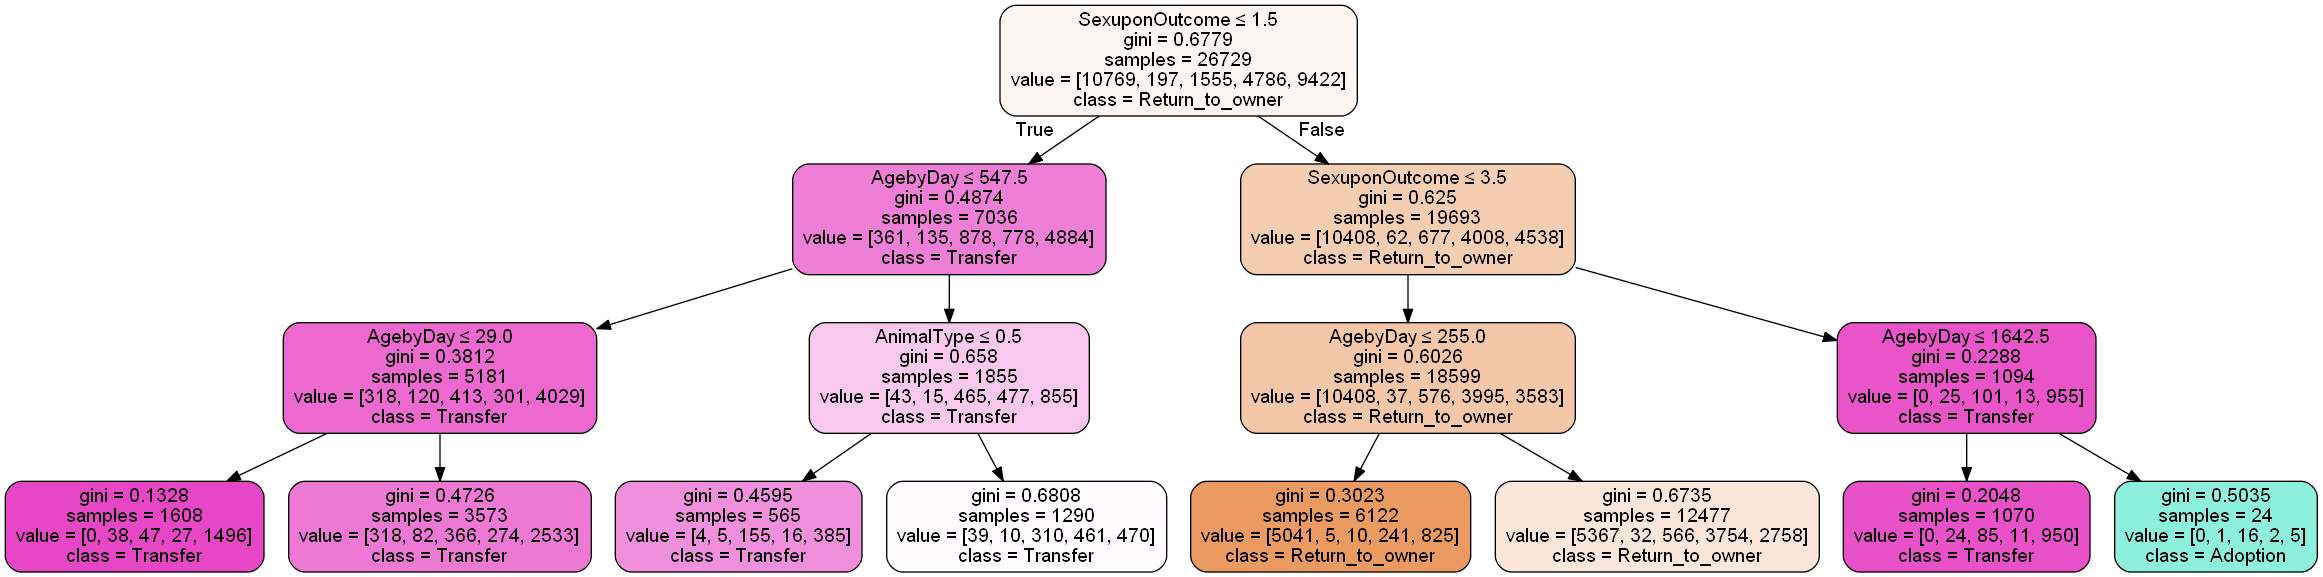

In [94]:
dot_data = tree.export_graphviz(clf, out_file=None,
                        feature_names=clf_X,
                        class_names=train.OutcomeType,
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

## Bagging

In [95]:
from sklearn.ensemble import BaggingClassifier

In [96]:
bagging = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)

In [97]:
bagging.fit(X, Y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)